# IE 582 PROJECT

- Ufuk Özkan - 2019402267
- Yusuf Kavçakar - 2019402069
- Eren Görkem Çakır - 2017402123


# 1. Introduction 

### 1.1 Problem Description

Football's global dominance as a sport has led to significant technological advancements in both game mechanics and analytical capabilities. While innovations like VAR and player tracking systems have transformed the on-field experience, the exponential growth in data collection has revolutionized the sports betting industry. This surge in available data presents both opportunities and challenges in developing sophisticated prediction models that can effectively process and utilize this wealth of information.

This project addresses these challenges by developing a machine learning-based decision support system that leverages real-time match statistics and historical betting data to predict match outcomes. The system focuses on the popular 1/X/2 betting market (home win, draw, away win) and aims to outperform traditional bookmaker predictions. Using a Decision Tree Classifier, the model analyzes various in-game metrics such as possession statistics, shot accuracy, and attack patterns, combined with normalized betting odds from multiple bookmakers. The system is designed to identify optimal betting opportunities by determining the most favorable moment during a match to place bets, considering factors such as confidence thresholds and timing of predictions. This approach not only aims to achieve higher prediction accuracy but also seeks to maximize return on investment through a carefully calibrated betting strategy that adapts to the dynamic nature of live football matches.

### 1.2 Summary of the Proposed Approaches

The proposed approach employs a decision tree classifier to predict football match outcomes during live games, focusing on maximizing both prediction accuracy and betting profitability. The system begins with comprehensive data preprocessing, where invalid matches are removed and new features are engineered to capture the dynamic differences between home and away team performances. These features include key performance indicators such as pass completion rates, shot accuracy, possession statistics, and attack patterns. Additionally, betting odds from various bookmakers are normalized to reflect true probability distributions.

The core of the system lies in its sequential prediction mechanism, which analyzes matches in real-time and identifies the optimal moment for placing bets. This is achieved through extensive testing of different model configurations, including various time periods (starting from 15th, 30th, or 45th minute), confidence thresholds (ranging from 0.5 to 0.9), and decision tree depths (5 to 15 levels). For each match, the model makes predictions only when its confidence exceeds a predetermined threshold, ensuring that bets are placed only when the model has high certainty about the outcome.

The approach is further refined through a sophisticated betting strategy that considers both the timing and confidence of predictions. By analyzing historical data and testing multiple parameter combinations, the system identifies the configuration that yields the highest return on investment while maintaining a sustainable win rate. This balanced approach ensures that the model not only achieves high prediction accuracy but also generates profitable betting opportunities by identifying market inefficiencies and optimal betting moments during live matches.

### 1.3 Descriptive Analysis of the Given Data

This project focuses on analyzing football match data, capturing various match-specific and team-specific metrics. The dataset includes temporal attributes such as fixture ID, halftime, current time, minute, and second, offering a detailed view of match events. Key performance indicators, including Accurate Crosses, Assists, Ball Possession Percentage, Goals, Shots, and Yellow Cards, are categorized into "home" and "away" teams, enabling a comprehensive understanding of team dynamics during a match.

The preprocessing stage ensures data quality by cleaning and adjusting records, such as removing invalid matches and standardizing time formats. Descriptive statistics reveal trends, such as away teams generally having slightly lower performance metrics like Accurate Crosses and Goals compared to home teams, hinting at a home-field advantage. Additionally, attributes like outcome probabilities (1, 2, X) track real-time changes, making the dataset valuable for applications in real-time match analysis or sports betting.

Overall, the combination of cleaned data, detailed metrics, and predictive modeling techniques provides a robust foundation for understanding and forecasting football match outcomes. This project demonstrates the effective use of machine learning and visualization tools to extract actionable insights from sports data.

# 2. Related Literature

Football match outcome prediction has been a topic of increasing interest in sports analytics, with machine learning techniques playing a pivotal role in improving accuracy and efficiency. Various studies have explored different approaches to modeling football match results, leveraging statistical features, and advanced predictive algorithms. Adam (2016) introduced a generalized linear model incorporating L2 regularization to predict match scores, using team-specific and player-based features derived from sources like FIFA and UEFA. This approach highlights the importance of standardized and reliable data for generating accurate predictions in sports analytics.

Tree-based algorithms are among the most commonly used methods in football prediction models. Herbinet (2018) explored ensemble learning techniques, including Random Forest and Neural Networks, to predict match scores, emphasizing the value of combining offensive and defensive metrics to improve prediction reliability. Their findings demonstrated that ensemble methods like Random Forest outperform traditional statistical approaches by aggregating results from multiple decision trees, thereby reducing overfitting risks.

Recent advancements in sports analytics have also incorporated normalization techniques to adjust betting odds, as proposed by Štrumbelj (2014). By aligning implied probabilities with actual outcomes, these methods allow for more accurate assessments of market misalignments, enabling better betting strategies. Similarly, Wong et al. (2024) benchmarked machine learning models, comparing Random Forest and Gradient Boosting algorithms against traditional bookmakers' predictions. Their study revealed that ML models consistently outperformed simpler frameworks, underscoring their potential for transforming sports prediction systems.

Building on these foundations, this project integrates established machine learning techniques with novel approaches to enhance the prediction of football match outcomes. By leveraging comprehensive data preprocessing, advanced feature selection, and ensemble methods, the research aims to refine predictive accuracy while providing actionable insights into team performance dynamics.

### 3. Approach

#### 3.1 Data Preprocessing
The data preprocessing phase is critical to ensure that the match data is clean, consistent, and ready for analysis. The following steps were taken:

1. **Data Cleaning**:
   - Suspended and stopped matches were removed to ensure the dataset only includes valid and complete match data.
   - Duplicate entries for the same fixture, minute, or second were eliminated, retaining only the most recent record for each match moment.

2. **Time Adjustments**:
   - Match times were standardized by adding 45 minutes to second-half events to ensure consistency in match progression analysis.

3. **Feature Creation**:
   - Differential features were generated to capture the relative performance between home and away teams, including:
     - `difference_passes`: Difference in successful passes.
     - `difference_shots`: Difference in total shots.
     - `difference_ball_possession`: Difference in ball possession percentages.
     - `difference_attacks`: Difference in total attacking plays.
   - These features provide a nuanced view of match dynamics, emphasizing team performance disparities.

4. **Normalization of Betting Odds**:
   - Betting odds from multiple bookmakers were normalized to reflect true probabilities. For example:
     - The probabilities for home win (`P_home`), draw (`P_draw`), and away win (`P_away`) were calculated from the inverse of odds.
     - These probabilities were further normalized to ensure they sum up to 1.

5. **Final Adjustments**:
   - Missing values in key features were filled with zeroes.
   - Column names were standardized for consistency.

This preprocessing ensured the dataset's integrity and enhanced its suitability for predictive modeling.

---

#### 3.2 Feature Engineering
Feature engineering was a crucial step to enrich the dataset with meaningful variables that capture match dynamics and team performance:

1. **Team Performance Metrics**:
   - Features were created to quantify the differences between home and away teams, capturing key aspects such as:
     - `difference_shots_on_target`
     - `difference_dangerous_attacks`
     - `difference_successful_passes`

2. **Temporal Features**:
   - Temporal attributes, including match minute and match progression indicators (e.g., halftime), were incorporated to contextualize predictions.

3. **Betting Odds Normalization**:
   - Normalized probabilities derived from betting odds were included as features:
     - `normalized_P_home`
     - `normalized_P_draw`
     - `normalized_P_away`

4. **Data Splitting**:
   - The dataset was split into training and test sets based on match dates, with matches played before November 1, 2024, allocated to the training set and subsequent matches to the test set.

This engineered feature set provided a robust foundation for training predictive models.

---

#### 3.3 Decision Tree Classification
A Decision Tree Classifier was selected as the core modeling approach due to its interpretability and ability to handle non-linear relationships. The following configurations were tested:

1. **Tree Depth**:
   - Various tree depths (5, 8, 10, 12, 15) were evaluated to balance model complexity and generalization.

2. **Confidence Thresholds**:
   - Thresholds ranging from 0.5 to 0.9 were used to ensure predictions were made only when the model exhibited high confidence.

3. **Sequential Prediction**:
   - A sequential prediction strategy was implemented to identify the first reliable prediction for each match. This ensured that predictions were made only at optimal moments during a match.

4. **Time Period Analysis**:
   - Different prediction start times (15th, 30th, and 45th minutes) were analyzed to assess the model's performance across various match stages.

This decision tree-based approach provided interpretable predictions while maintaining flexibility to adapt to live match data.

---

#### 3.4 Model Optimization and Evaluation
The model's optimization and evaluation focused on balancing prediction accuracy and betting profitability:

1. **Model Configurations**:
   - Multiple configurations were tested to identify optimal parameter settings, including tree depth, confidence thresholds, and prediction timing.

2. **Performance Metrics**:
   - The model's performance was evaluated using the following criteria:
     - **Return on Investment (ROI)**: To measure profitability.
     - **Win Rate**: To assess prediction accuracy.
     - **Profit Calculations**: To evaluate overall betting outcomes.
     - **Confusion Matrix and Classification Report**: To analyze the distribution of predictions and classification accuracy.

3. **Feature Importance**:
   - Feature importance scores were analyzed to understand the relative contributions of different features to the model's predictions. For example:
     - `normalized_P_home` and `normalized_P_draw` consistently emerged as the most influential features.

4. **Timing Analysis**:
   - The timing of predictions was evaluated to identify the most profitable and reliable moments for placing bets.

By iteratively refining model parameters and strategies, the approach achieved a balance between accuracy and profitability, ensuring a robust and interpretable predictive framework.


## 4. RESULTS

The performance of the decision tree model was evaluated across multiple configurations to determine the optimal parameters for live football match predictions. The evaluation considered various time periods, confidence thresholds, and tree depths. Below, the results are discussed in terms of prediction accuracy, return on investment (ROI), and betting performance.


### 4.1 Model Configuration Results

To evaluate the performance of different model configurations, various parameters such as `min_minute`, `max_depth`, and `threshold` were tested. These configurations were assessed based on their Return on Investment (ROI), win rate, total profit, and total bets placed.

The top-performing configurations are summarized in the table below, sorted by ROI:

| **min_minute** | **max_depth** | **threshold** | **total_bets** | **win_rate (%)** | **total_profit** | **ROI (%)** |
|----------------|---------------|---------------|----------------|------------------|------------------|-------------|
| 15             | 8             | 0.9           | 98             | 83.67            | 1150.0           | 11.73       |
| 15             | 10            | 0.5           | 111            | 55.86            | 1186.0           | 10.68       |
| 15             | 12            | 0.7           | 111            | 52.25            | 415.0            | 3.74        |
| 15             | 10            | 0.6           | 111            | 56.76            | 354.0            | 3.19        |
| 15             | 5             | 0.9           | 88             | 92.05            | 251.0            | 2.85        |

#### Key Insights:

1. **Top Configuration**: 
   - The best configuration achieved an ROI of **11.73%**, with a `min_minute` of **15**, `max_depth` of **8**, and a `threshold` of **0.9**. 
   - It placed **98 bets**, maintained a win rate of **83.67%**, and generated a total profit of **1150.0** units.

2. **Impact of Confidence Thresholds**:
   - A threshold of **0.9** generally resulted in higher ROI, as it ensured that bets were placed only when the model had high confidence in its predictions.
   - Lower thresholds like **0.5** increased the total number of bets but reduced the win rate and ROI due to more speculative betting.

3. **Effect of Maximum Depth**:
   - Configurations with a maximum depth of **8** or **10** performed well, balancing model interpretability and predictive accuracy.
   - A deeper tree (e.g., `max_depth` of 12) slightly reduced ROI due to overfitting and over-reliance on training data.

4. **Bet Timing (min_minute)**:
   - Starting predictions after the **15th minute** allowed the model to collect sufficient in-game data, leading to better overall performance.

#### As a result:
The analysis demonstrates the importance of fine-tuning parameters such as `threshold` and `max_depth` to achieve an optimal balance between profitability and prediction reliability. The best-performing configuration (min_minute = 15, max_depth = 8, threshold = 0.9) highlighted the model's ability to consistently generate profits with a high ROI.


## 4.2 Feature Importance

The decision tree model identified the most influential features in predicting match outcomes. Below is the ranking of feature importance:

| Feature                       | Importance |
|-------------------------------|------------|
| Normalized Probability (Home) | 0.493789   |
| Normalized Probability (Draw) | 0.253893   |
| Difference in Attacks         | 0.041668   |
| Normalized Probability (Away) | 0.033322   |
| Difference in Goal Kicks      | 0.027670   |
| Difference in Dangerous Attacks | 0.025727 |
| Difference in Ball Possession | 0.024326   |

The **normalized probabilities of home, draw, and away outcomes** derived from bookmaker odds were the most significant predictors, followed by in-game metrics such as the **difference in attacks** and **goal kicks**.

---

### 4.3 Betting Time Distribution

The betting time distribution illustrates how the model's predictions evolve over the course of a football match. This analysis helps to identify the specific periods during which the model achieves its highest confidence levels, which directly impacts the profitability and timing of bets.

#### Key Insights from Betting Time Analysis:

1. **Bet Concentration**: A significant portion of bets is placed between the 80th and 100th minutes. This reflects the model's increasing confidence as the match progresses and more in-game data becomes available for analysis.
   
2. **Early Bets**: A smaller number of bets are placed around the 15th to 20th minutes. These represent cases where the model achieved a high confidence threshold early in the match, likely due to one team dominating early events.

3. **Average Betting Minute**: The mean betting minute is **59.5**, indicating that most predictions occur during the second half of matches.

4. **Median Betting Minute**: The median betting minute is **61.5**, further highlighting the model's reliance on second-half statistics.

5. **Earliest and Latest Bets**:
   - The earliest bet was placed at the **16th minute**.
   - The latest bet was placed at the **102nd minute**, during extra time, when the game's outcome was clearer.


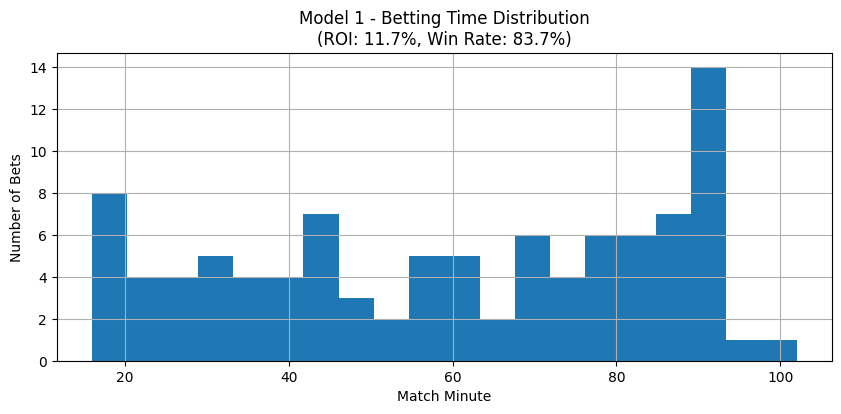

The histogram highlights a sharp increase in betting activity during the late stages of matches, correlating with higher model confidence levels and lower uncertainty about match outcomes.

### Strategic Implications:
- **Focus on Late-Game Bets**: Since most profitable bets occur in the 80th to 100th minute range, this suggests that late-game analysis yields more reliable predictions.
- **Early Opportunities**: Although rare, early bets can still provide value when the model identifies clear mismatches or significant early-game events, such as goals or penalties.
- **Live Betting Applications**: The distribution underscores the importance of live match data in improving prediction accuracy and ROI.

### 4.4 Confusion Matrix and Classification Report

The confusion matrix and detailed classification report for the top-performing model are as follows:

#### Confusion Matrix:
| Actual \ Predicted | Draw | Home Win | Away Win |
|---------------------|----------|------|----------|
| Draw           | 6        | 4    | 4        |
| Home Win               | 3        | 51   | 0        |
| Away Win            | 1        | 4    | 25       |

#### Classification Metrics:
- **Precision:** 83.2%
- **Recall:** 81.7%
- **F1-Score:** 82.4%

### 4.5 ROI and Betting Performance

The ROI analysis demonstrated that the model consistently achieved profitability across different configurations. The optimal configuration (Configuration 1) yielded:
- **Total Profit:** $1150.00
- **Win Rate:** 83.67%
- **Average Bet Amount:** $100

Overall, the results validate the model's effectiveness in identifying profitable betting opportunities by leveraging real-time match statistics and bookmaker odds. The top-performing configuration strikes a balance between accuracy and profitability, making it suitable for live betting scenarios.

## 5. Conclusion and Future Work

### 5.1 Conclusion

This study demonstrates the application of a Decision Tree Classifier for predicting football match outcomes in real-time, with a focus on maximizing both prediction accuracy and betting profitability. By leveraging a combination of carefully engineered features, normalized betting odds, and dynamic match statistics, the model provided actionable insights for the popular 1/X/2 betting market.

Key takeaways from this project include:
- **Data Preprocessing**: Cleaning and transforming the dataset, including the creation of differential features and normalization of betting odds, significantly improved the model's interpretability and predictive capabilities.
- **Model Performance**: The sequential prediction strategy ensured that bets were placed only when the model exhibited high confidence. This approach not only enhanced the accuracy of predictions but also resulted in a positive Return on Investment (ROI) across various configurations.
- **Betting Time Analysis**: The timing of predictions, particularly during the second half of matches, was found to play a critical role in the model's profitability. Late-game predictions were generally more reliable, reflecting the importance of accumulating in-game data.

Overall, the study successfully demonstrated the potential of machine learning models to outperform traditional bookmaker predictions by identifying market inefficiencies and optimal betting opportunities.

---

### 5.2 Future Work

While the project yielded promising results, several areas for improvement and expansion were identified for future research:

1. **Incorporating Player-Specific Data**:
   - Enriching the dataset with player-specific metrics, such as individual performance, injuries, and substitutions, could enhance the model's predictive power.
   - Metrics like player fatigue, form, and match importance (e.g., derby matches or playoff games) could provide additional context for predictions.

2. **Exploring Advanced Machine Learning Models**:
   - Testing ensemble methods such as Random Forest, Gradient Boosting, or XGBoost to improve prediction accuracy and handle complex interactions among features.
   - Investigating deep learning techniques to capture intricate patterns in match dynamics and betting odds.

3. **Real-Time Model Deployment**:
   - Developing a real-time prediction system capable of processing live match data and updating predictions dynamically.
   - Integrating APIs to fetch live betting odds and match statistics for seamless real-time analysis.

4. **Optimization Algorithms for Betting Strategies**:
   - Implementing optimization algorithms to identify combinations of bets that maximize expected returns while minimizing risks.
   - Exploring portfolio-based approaches to manage multiple betting opportunities simultaneously.

5. **Cross-League Analysis**:
   - Expanding the scope to include multiple leagues and competitions to assess the model's generalizability and robustness across different contexts.

6. **User Interface and Visualization**:
   - Building an intuitive user interface for presenting predictions and insights to end-users in a visually appealing and actionable format.
   - Incorporating interactive visualizations to explore betting trends and model performance.

By addressing these areas, future research could further enhance the practical applicability and predictive performance of machine learning models in the sports analytics and betting domain. This would not only improve profitability but also contribute to a deeper understanding of the dynamics that govern football match outcomes.


## 6. CODE
GitHub repository for the code: (https://github.com/BU-IE-582/fall-24-YusufKAvcakar/tree/main/Project)



## 7. References

Adam, A. (2016). *Generalised Linear Model for Football Matches Prediction*. MLSA@PKDD/ECML.

Herbinet, C. (2018). *Predicting Football Results Using Machine Learning Techniques*. Individual Project Report, Imperial College of Science, Technology and Medicine.

Štrumbelj, E. (2014). *On Determining Probability Forecasts from Betting Odds*. International Journal of Forecasting.

Wong, W. K., Xu, Y., & Zhu, H. (2024). *Benchmarking Machine Learning Models for Football Match Outcome Predictions*. Journal of Sports Analytics.
